In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
'''df_1=pd.read_excel("employee.xlsx")
data=df_1[['Education','HourlyRate','MonthlyIncome']]
df=pd.DataFrame(data)
print(df.info())
print(df.isnull().sum())'''

df_1=pd.read_excel("churn.xlsx")
print(df_1.info())
print(df_1.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [111]:
df.sample(5)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB
None


In [112]:
data=df_1[['tenure','MonthlyCharges','TotalCharges',]]
df=pd.DataFrame(data)
df

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.5
7039,72,103.20,7362.9
7040,11,29.60,346.45
7041,4,74.40,306.6


<Axes: xlabel='tenure', ylabel='Density'>

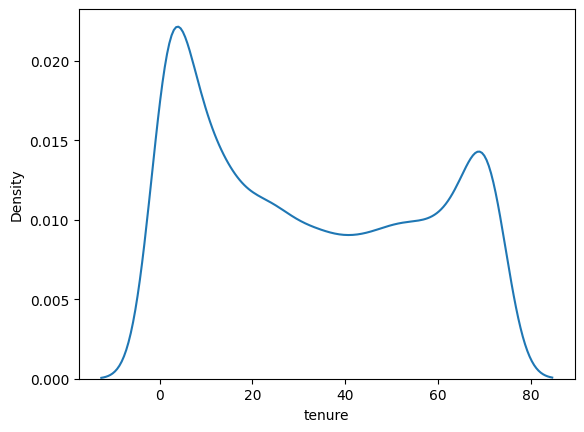

In [104]:
sns.kdeplot(df['tenure'])

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

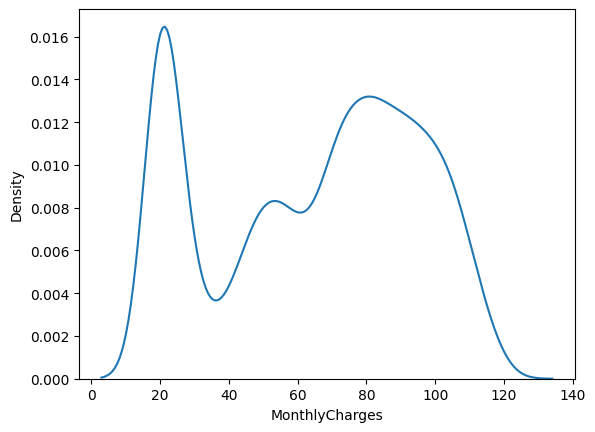

In [105]:
sns.kdeplot(df['MonthlyCharges'])

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('tenure',axis=1),df['tenure'],test_size=0.3,random_state=42)

X_train.shape,X_test.shape

((4930, 2), (2113, 2))

In [117]:
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test  = X_test.apply(pd.to_numeric, errors="coerce")

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [122]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

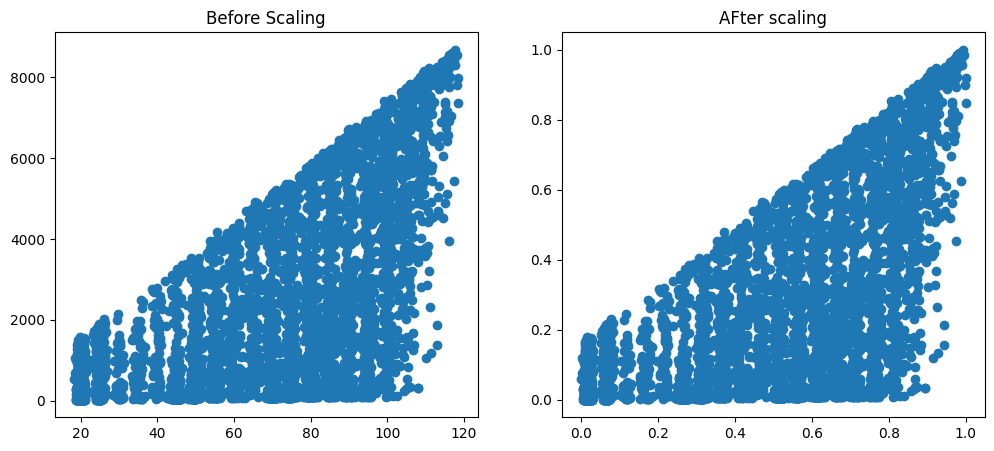

In [129]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['MonthlyCharges'],X_train['TotalCharges'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['MonthlyCharges'],X_train_scaled['TotalCharges'])
ax2.set_title("AFter scaling")
plt.show()

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("before scaling")
